    # Automatic Jupyter Notebook for OpenML dataset 9: autos

In [1]:
from scripts.preamble import *
did = 9
data = oml.datasets.get_dataset(did)
task, topList, strats = printTopNFlows(did, 10) 
topList 

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,flow,score
0,weka.kf.AttributeSelection-Ranker-ReliefF-KSta...,0.972876
1,weka.RotationForest_PrincipalComponents_J48(14),0.971229
2,weka.RotationForest_PrincipalComponents_J48(14),0.970180
3,weka.RotationForest_PrincipalComponents_J48(3),0.970180
4,RandomRules(1),0.968295
5,RandomRules(1),0.968295
6,weka.kf.AttributeSelection-BestFirst-CfsSubset...,0.967469
7,weka.RotationForest_PrincipalComponents_J48(14),0.967256
8,weka.RotationForest_PrincipalComponents_J48(14),0.966511
9,weka.Bagging_J48(2),0.964775


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


Complexity threshold to determine if an algorithm will be run.


In [3]:
comp = 50000000000000

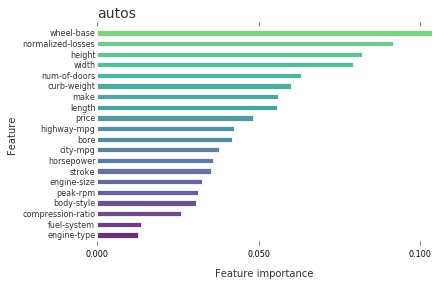

In [4]:
from scripts.featureImportance import *
featureImportance(data) 

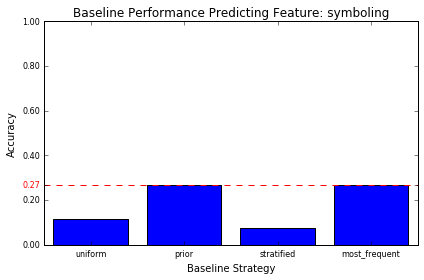

In [5]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Median execution time in ms: 10.0
Mean execution time in ms: 480.0


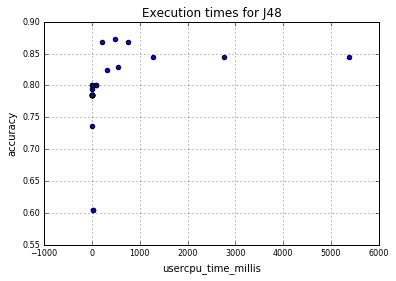

Median execution time in ms: 40.0
Mean execution time in ms: 48.75


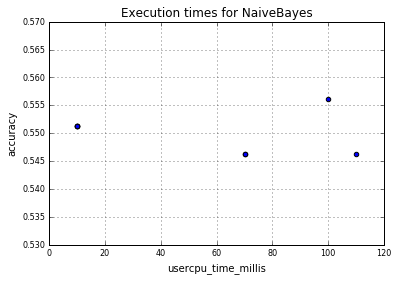

Median execution time in ms: 60.0
Mean execution time in ms: 55.45454545454545


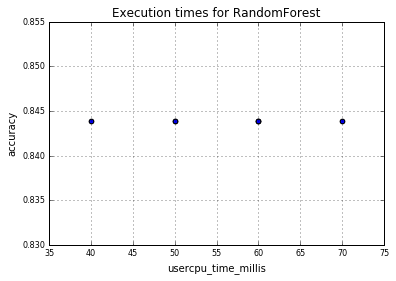

Median execution time in ms: 80.0
Mean execution time in ms: 74.54545454545455


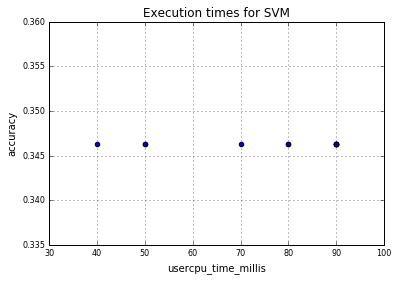

Median execution time in ms: 20.0
Mean execution time in ms: 20.0


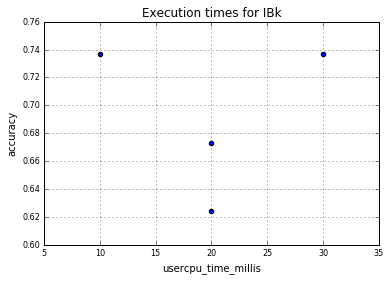

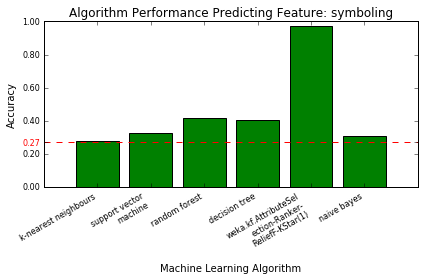

In [6]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=True, runTPOT=False)
plot_alg(data, strats, maxBaseline, problemType) 